#Introducción a Redes Complejas en Biología de Sistemas

##Carolina Fritz, Luna Kadysz, Melisa Vinograd

####1C 2020

# Guia 1


In [0]:
# Importamos estas librerias para graficar las redes!
import networkx as nx
import matplotlib.pyplot as plt

## 1) Nodos esenciales

### a) Un grafo en el que cual cualquier nodo  sea  esencial  para  al  menos  un  par  de nodos del grafo:
Cualquier grafo que sea lineal y cerrado (con más de tres nodos) va a cumplir con las condiciones necesarias. 
En el ejemplo, el nodo 1 es esencial para el par (0-2). Lo mismo vale para todos los nodos respecto de sus dos únicos primeros vecinos.

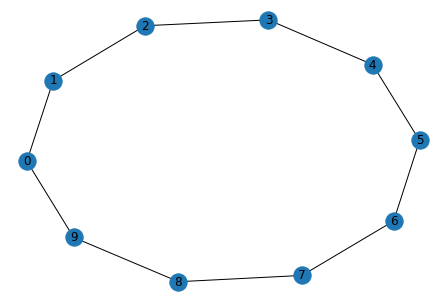

In [0]:
cantidad_nodos=10
Red_ciclo = nx.cycle_graph(cantidad_nodos)
nx.draw(Red_ciclo, with_labels=True)

### b) Un grafo en el que todo nodo sea esencial al menos para dos pares diferentes de nodos:
Cualquier grafo lineal y cerrado con al menos 7 nodos cumple con las condiciones necesarias. 
En el ejemplo el nodo 1 es esencial para el par (0-2) y el par (0-3) y por isomorfismo (los índices de los nodos son intercambiables mientras se respete el orden) vale para todos los nodos.

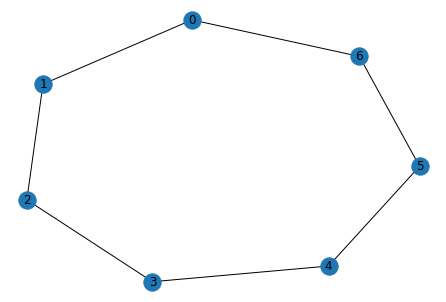

In [0]:
cantidad_nodos=7
Red_ciclo = nx.cycle_graph(cantidad_nodos)
nx.draw(Red_ciclo, with_labels=True)

### c) Un grafo, de al menos cuatro nodos, en el que existe un único nodo que sea esencial para cualquier par de nodos que no lo incluya
Una red de tipo estrella, con un nodo central que conecta a todos los otros nodos, cumple con las condiciones (el nodo que cumple es el nodo central 0).

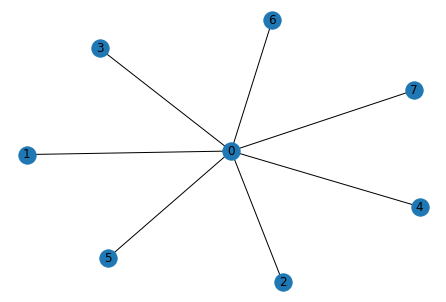

In [0]:
cantidad_nodos=7
Red_estrella = nx.star_graph(cantidad_nodos)
nx.draw(Red_estrella, with_labels=True)

## 2) Nodos porteros

![ejercicio2](https://drive.google.com/uc?id=1afVNg4rXOzRADHe3xULRYe9PRN4mDQs_)





### a) Caracterizamos al  nodo  A  en  términos  de portería.
Hay 9 enlaces que no incluyen al nodo A, de esos hay 2 enlaces para los cuales no es portero, 1 enlace para el cual es portero local y 6 enlaces para los cuales es portero:

A es portero para:
*   B-E
*   B-F
*   C-E
*   C-F
*   D-E
*   D-F


A es portero local para:
*   B-C 


No es portero para:
*   B-D
*   E-F
*   C-D
 

### b) Un  ejemplo  de  un  grafo  donde  más de la mitad de sus nodos sean porteros.
Un ejemplo posible puede ser un grafo lineal no cerrado con al menos 5 nodos. En este caso, el primer (0) y último nodo (4) no son porteros y todos los demás si para al menos un par de nodos. Por ejemplo, 1 es portero para todos los pares que incluyan al nodo 0.


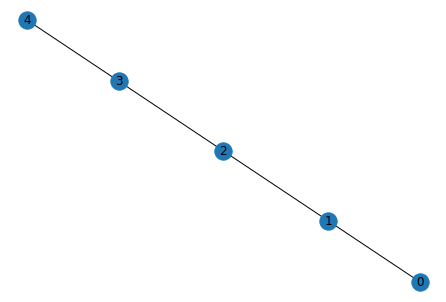

In [0]:
Red = nx.Graph()
Red.add_edges_from([(0,1), (1,2), (2,3),(3,4)]) 
nx.draw(Red, with_labels=True)

### c) Un  ejemplo  de  un  grafo  que  no presente   porteros,   pero   donde   cada nodo sea un portero-local
Un ejemplo posible es una red cíclica de 4 nodos (un cuadrado!) donde el nodo 1 es portero local del par (0-2) (sus dos vecinos no conectados), pero no es portero ya que el camino de 0 a 2 se puede hacer pasando por 0 ó por 3. Esto pasa en cualquier red ciclica con mas de tres nodos (donde no hay porteros ya que siempre hay dos caminos posibles). 

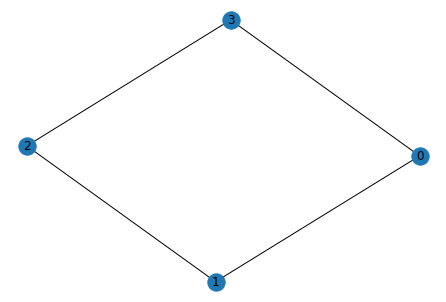

In [0]:
cantidad_nodos=4
Red_ciclo = nx.cycle_graph(cantidad_nodos)
nx.draw(Red_ciclo, with_labels=True)

## 3)

### a) Un ejemplo de un grafo cuyo diámetro sea más de tres veces su distancia media
Un ejemplo posible es un grafo estrella unido por el nodo central a un grafo lineal, de manera tal que el grafo lineal incrementa el diámetro por cada nodo unido. La gran cantidad de nodos del grafo estrellla (distancia media ~2), en comparacion el tamaño de la red lineal, disminuyen la distancia media total. Esta red es conocida como Lollipop.

La distancia media de la red es 2.4755244755244754
El diámetro de la red es 8


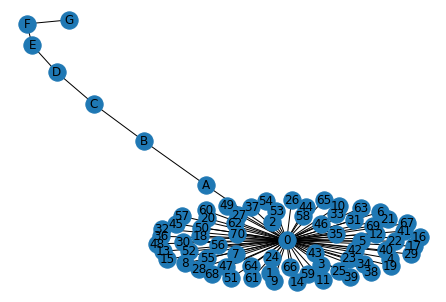

In [0]:
cantidad_nodos=70 #Nodos de la red estrella
Red = nx.star_graph(cantidad_nodos)
Red.add_edges_from([(0,'A'), ('A','B'),('B','C'), ('C','D'),('D','E'),('E','F'),('F','G')]) #Agregamos enlaces "lineales"
nx.draw(Red, with_labels=True)

mean_dist= nx.average_shortest_path_length(Red)
print('La distancia media de la red es ' + str(mean_dist))
Diametro = nx.diameter(Red)
print('El diámetro de la red es ' + str(Diametro))

### b) Extienda lo encontrado para producir grafos cuyo diámetro exceda la distancia media en un factor arbitrario. 
$diam \geq <d_{ij}> $

Para generalizar el método propuesto para redes de tipo estrella, creamos una función que acepta como parámetro el factor arbitrario y devuelve una red con las características pedidas. 

Creamos un red con factor de proporcion entre el diametro y la distancia media de 4.00091533180778
La distancia media de la red es 4.498970487302676
El diámetro de la red es 18
La red tiene 77 nodos que forman parte de una red estrella y 17 nodos en una red lineal conectados


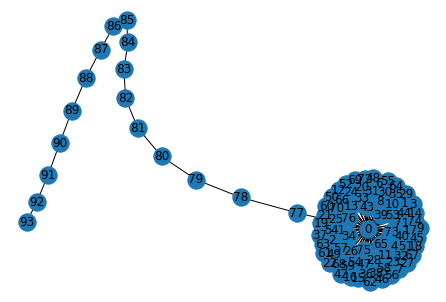

In [0]:
def grafo(factor_deseado):
  N = 70 #Nodos de la red estrella inicial
  M = 10 #Nodos de la red linear inicial
  
  factor_calculado=0 #factor calculado, inicializacion de la variable
  while factor_calculado < factor_deseado:
    
    #Incremento el numero de N y M en cada iteracion
    M = M + 1
    N = N + 1

    #Creo la red estrella de nodos 0,N
    Red = nx.star_graph(N)

    #Creo el nuevo vector de enlaces
    nuevos_nodos=range(N, N + M)
    nuevos_enlaces=[]
    for i in range(1,len(nuevos_nodos)):
      nuevos_enlaces.append((nuevos_nodos[i-1],nuevos_nodos[i]))
    
    #Agrego los nuevos enlaces a la red:
    Red.add_edges_from(nuevos_enlaces)

    #Calculo distancia media y diametro:
    distancia_media= nx.average_shortest_path_length(Red)
    Diametro = nx.diameter(Red)
    factor_calculado= Diametro / distancia_media

  nx.draw(Red, with_labels=True)
  print('Creamos un red con factor de proporcion entre el diametro y la distancia media de ' + str(factor_calculado))
  print('La distancia media de la red es ' + str(distancia_media))
  print('El diámetro de la red es ' + str(Diametro))
  print('La red tiene ' + str(N) + ' nodos que forman parte de una red estrella y ' + str(M) + ' nodos en una red lineal conectados')
  return Red


factor_deseado = 4
G = grafo(factor_deseado)

## 4)

![texto alternativo](https://drive.google.com/uc?id=1tHEAwkvfNbBX6aPiv_U-RmMIWRXBRKpf)


Asumiendo la hipótesis fuerte de clausura transitiva,  el enlace entre los nodos (b,c) se espera que sea weak. 

Si (b,c) fuera un enlace fuerte, entonces (c,e) tendria que tener un enlace, lo mismo (f,b).

## 5)

![texto alternativo](https://drive.google.com/uc?id=1Zl5auA88Z4hAsAY4mwoM9Eqp0p4TUM8V)

## Los enlaces que violan la hipotesis fuerte de clausura transitiva son:

1.   
*   ED y CE son enlaces fuertes, pero CD no tiene enlace.
*   BC  y CE son enlaces fuertes, pero BE no tiene enlace.
2.    
* Es el mismo grafo que (1) con otro layout. 


3.   
*   BC y CE tienen enlaces fuertes, pero BE no
*   AC y CE tienen enlaces fuertes, pero AE no

## 6)

![texto alternativo](https://drive.google.com/uc?id=1-UoZOOEUfFmJY0E2gsUITm2-Gd83lDNo)

Por el ppo de clausura transitiva, BD  es el vinculo de amistad que tiene mas probabilidad porque B tiene tres enlaces en comun con D. Ambos son amigos de A, de C y de E. Un enlace entre B y D cerraría tres triangulos. 

En cambio, los enlaces AC, AE y CE  tienen probabilidad menor de formarse porque tienen 2 amigos en comun (cerrarían tres triangulos).

## 7)

![texto alternativo](https://drive.google.com/uc?id=1xfQ2LD0eqyRXgVCVOqwBPZ_AxAsCawyB)

####a) La  proyección  de  dicho  grafo bipartito para  los individuos.





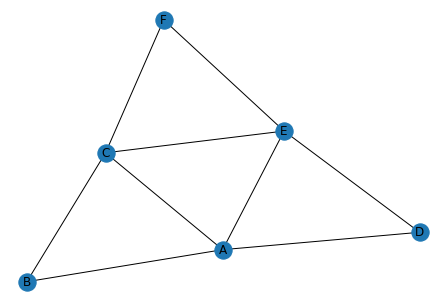

In [0]:
Red = nx.Graph()
Red.add_edges_from([('A','B'),('A','C'),('A','D'),('A','E'),('B','C'),('C','E'),('C','F'),('D','E'),('E','F')]) 
nx.draw(Red, with_labels=True)

####b) 
El  triángulo {A,C,E} es  diferente  a  cualquier  otro triángulo  del  grafo  proyectado porque los nodos A, C y E estan cada uno en dos grupos de afiliacion, mientras que los otros tres nodos (B, D y F) solo pertenecen a un grupo de filiacion.

## 8)  Ejemplos de dos redes de afiliación diferentes que posean la misma red proyectada:


Dos redes de afiliacion diferentes que posean la misma red proyectada se podrian conseguir intercambiando X con Y o Y con X, o X con Z. Esto se debe a que el nombre especifico de las filiaciones no importa, solo se toma en cuenta los enlaces entre individuos que generan.


Otra opcion seria agregar una nueva filiacion que respete los vinculos preexistentes, es decir que no agregue nuevos enlaces. Un ejemplo seria un nuevo grupo de afiliacion "W" conectado a E y F. 

## 9)

![texto alternativo](https://drive.google.com/uc?id=18rBK-Y5Jxh82Ndb8Pu9n2vPl0SSAfmVG)

#### a)
X -> A E C
Y -> A B E
Z -> B F D
W -> C F D


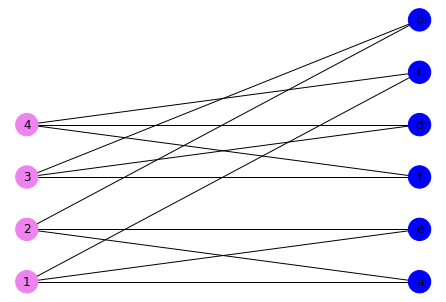

In [0]:
from networkx.algorithms import bipartite
Red_bipartita = nx.Graph()
Red_bipartita.add_nodes_from([1, 2, 3, 4], bipartite=0)
Red_bipartita.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f'], bipartite=1)
Red_bipartita.add_edges_from([(1, 'a'),(1, 'c'), (1, 'e'), (2, 'a'), (2, 'b'),(2, 'e'), (3, 'b'), (3, 'd'), (3, 'f'), (4, 'c'), (4, 'd'), (4, 'f')])
X, Y = bipartite.sets(Red_bipartita)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # nodos de X en x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # nodos de Y en x=2
nx.draw(Red_bipartita, 
        pos=pos,
        with_labels=True, 
        node_size = 500, 
        node_color = ["violet" if bipartite==0  else "blue" for bipartite in nx.get_node_attributes(Red_bipartita, "bipartite").values()])
plt.show()



#### b) Cualquier  red  de  afiliación  asociada  al  grafo  monopartito  de  la  figura debe contener al menos 4 nodos de afiliación.
 La cantidad mínima de instituciones necesarias para un grafo proyectado serán la mínima cantidad de grafos completos que se puedan sacar de la red utilizando todos los nodos y enlaces al menos una vez. En este caso, hay como mínimo cuatro grafos completos (cuatro triángulos): ACE, ABE, CDF, BDF. Esto se cumple ya que un grafo completo requiere sólo un nodo de afiliación ya que todos los nodos se conectan con todos. 